# Implement Standard Neural Net for Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

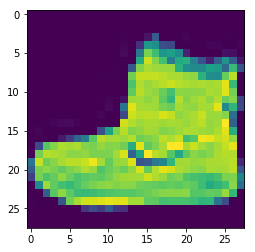

In [5]:
plt.imshow(X_train[0])

In [6]:
print('X_train shape', X_train.shape)     # 60000 samples
print('X_test shape', X_test.shape)       # 10000 test samples
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [7]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train/=255
X_test/=255

In [9]:
print ('train matrix shape', X_train.shape)
print ('test matrix shape', X_test.shape)

train matrix shape (60000, 784)
test matrix shape (10000, 784)


In [10]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [11]:
from keras.utils import np_utils

In [12]:
n_classes=10

In [26]:
y_orig=y_test
print('Shape before one-hot coding', y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print('Shape after one-hot coding', y_train.shape)

Shape before one-hot coding (60000, 10)
Shape after one-hot coding (60000, 10, 10)


In [27]:
y_train[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
from keras.models import Sequential    # Keras has all neural networks
from keras.layers.core import Dense,Activation

In [29]:
model =  Sequential()
model.add(Dense(100,input_shape=(784,)))    # input is 28x28=784
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [32]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 5, validation_data= [X_test, y_test])
#  epoch run 60000 samples each time

ValueError: Error when checking target: expected activation_6 to have 2 dimensions, but got array with shape (60000, 10, 10)

In [33]:
y_pred = model.predict_classes(X_test)

In [34]:
y_pred.shape

(10000,)

In [35]:
X_temp = X_test[0].reshape(28,28)    # sample[0] is tested amongst 10000 samples

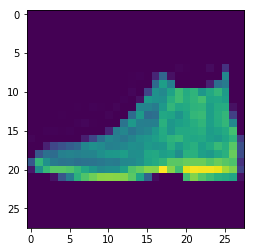

In [36]:
plt.imshow(X_temp)
plt.show()

In [37]:
y_pred[0] 

5

In [39]:
i_i=np.nonzero(y_pred != y_orig)[0]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
